<a href="https://colab.research.google.com/github/Sadaf-Khademi/INSE6220FinalProject/blob/main/INSE6220FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binary Classification with PyCaret**

Binary classification is a supervised machine learning technique where the goal is to classify instances into one of two classes. 

**Install Pycaret**

In [4]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
from google.colab import files
plt.rcParams['figure.figsize'] = (7,5)
import gdown

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The main aim of the data is to discriminate
healthy people from those with Parkinson's Disease (PD), according to the ”status”
column which is set to 0 for healthy and 1 for PD. A set of
7 features related to several measurements of frequency and
amplitude of voice-recording signals including Flo (Hz), Jitter (%),
Jitter (Abs), RAP, PPQ, Jitter: DDP, and MDVP: Shimmer
is used to diagnose PD in this study



All of these parameters are real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [44]:
id = "1LlsSrhxJmuBVS60Iai56TGiGI8Fktkdw"
output = "parkinson-disease.csv"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LlsSrhxJmuBVS60Iai56TGiGI8Fktkdw
To: /content/parkinson-disease.csv
100%|██████████| 11.4k/11.4k [00:00<00:00, 10.7MB/s]


'parkinson-disease.csv'

In [45]:
#read csv file into dataframe
df = pd.read_csv('./parkinson-disease.csv')
df.head(25)

Flo(Hz)  Jitter(%)  Jitter(Abs)      RAP      PPQ  Jitter:DDP  \
0    74.997    0.00784      0.00007  0.00370  0.00554     0.01109   
1   113.819    0.00968      0.00008  0.00465  0.00696     0.01394   
2   111.555    0.01050      0.00009  0.00544  0.00781     0.01633   
3   111.366    0.00997      0.00009  0.00502  0.00698     0.01505   
4   110.655    0.01284      0.00011  0.00655  0.00908     0.01966   
5   113.787    0.00968      0.00008  0.00463  0.00750     0.01388   
6   114.820    0.00333      0.00003  0.00155  0.00202     0.00466   
7   104.315    0.00290      0.00003  0.00144  0.00182     0.00431   
8    91.754    0.00551      0.00006  0.00293  0.00332     0.00880   
9    91.226    0.00532      0.00006  0.00268  0.00332     0.00803   
10   84.072    0.00505      0.00006  0.00254  0.00330     0.00763   
11   86.292    0.00540      0.00006  0.00281  0.00336     0.00844   
12  131.276    0.00293      0.00002  0.00118  0.00153     0.00355   
13   76.556    0.00390      0.00003  0.00165  0.00208     0.00496   
14   75.836    0.00294      0.00002  0.00121  0.00149     0.00364   
15   83.159    0.00369      0.00003  0.00157  0.00203     0.00471   
16   82.764    0.00544      0.00004  0.00211  0.00292     0.00632   
17   75.603    0.00718      0.00004  0.00284  0.00387     0.00853   
18   68.623    0.00742      0.00005  0.00364  0.00432     0.01092   
19  142.822    0.00768      0.00005  0.00372  0.00399     0.01116   
20   65.782    0.00840      0.00005  0.00428  0.00450     0.01285   
21   78.128    0.00480      0.00003  0.00232  0.00267     0.00696   
22   79.068    0.00442      0.00003  0.00220  0.00247     0.00661   
23   86.180    0.00476      0.00003  0.00221  0.00258     0.00663   
24   76.779    0.00742      0.00005  0.00380  0.00390     0.01140   

    MDVP:Shimmer  status  
0        0.04374       1  
1        0.06134       1  
2        0.05233       1  
3        0.05492       1  
4        0.06425       1  
5        0.04701       1  
6        0.01608       1  
7        0.01567       1  
8        0.02093       1  
9        0.02838       1  
10       0.02143       1  
11       0.02752       1  
12       0.01259       1  
13       0.01642       1  
14       0.01828       1  
15       0.01503       1  
16       0.02047       1  
17       0.03327       1  
18       0.05517       1  
19       0.03995       1  
20       0.03810       1  
21       0.04137       1  
22       0.04351       1  
23       0.04192       1  
24       0.01659       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Flo(Hz)       195 non-null    float64
 1   Jitter(%)     195 non-null    float64
 2   Jitter(Abs)   195 non-null    float64
 3   RAP           195 non-null    float64
 4   PPQ           195 non-null    float64
 5   Jitter:DDP    195 non-null    float64
 6   MDVP:Shimmer  195 non-null    float64
 7   status        195 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.3 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

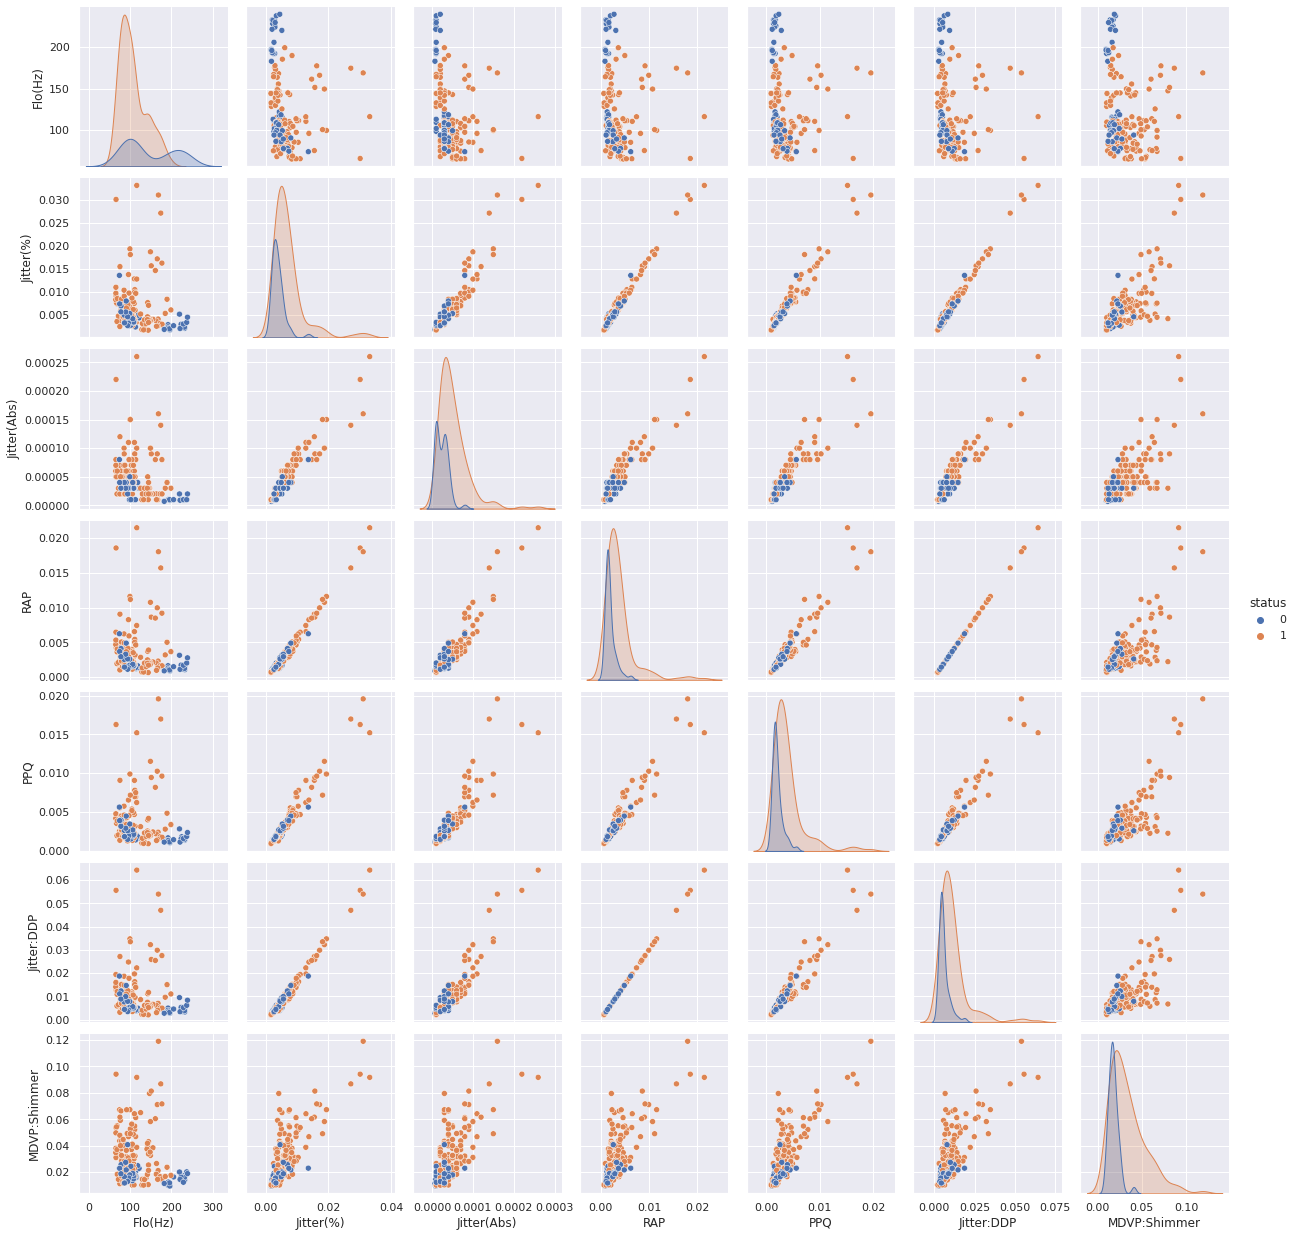

In [ ]:
sns.pairplot(df,hue="status")
plt.show()

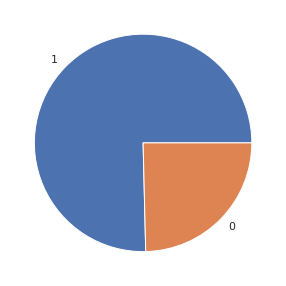

In [ ]:
y=df['status']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


**Data Matrix**

In [ ]:
X = df.drop(columns=['status'])
X.head(10)

Flo(Hz)  Jitter(%)  Jitter(Abs)      RAP      PPQ  Jitter:DDP  MDVP:Shimmer
0   74.997    0.00784      0.00007  0.00370  0.00554     0.01109       0.04374
1  113.819    0.00968      0.00008  0.00465  0.00696     0.01394       0.06134
2  111.555    0.01050      0.00009  0.00544  0.00781     0.01633       0.05233
3  111.366    0.00997      0.00009  0.00502  0.00698     0.01505       0.05492
4  110.655    0.01284      0.00011  0.00655  0.00908     0.01966       0.06425
5  113.787    0.00968      0.00008  0.00463  0.00750     0.01388       0.04701
6  114.820    0.00333      0.00003  0.00155  0.00202     0.00466       0.01608
7  104.315    0.00290      0.00003  0.00144  0.00182     0.00431       0.01567
8   91.754    0.00551      0.00006  0.00293  0.00332     0.00880       0.02093
9   91.226    0.00532      0.00006  0.00268  0.00332     0.00803       0.02838

In [ ]:
X.describe().transpose()

count        mean        std        min        25%        50%  \
Flo(Hz)       195.0  116.324631  43.521413  65.476000  84.291000  104.31500   
Jitter(%)     195.0    0.006220   0.004848   0.001680   0.003460    0.00494   
Jitter(Abs)   195.0    0.000044   0.000035   0.000007   0.000020    0.00003   
RAP           195.0    0.003306   0.002968   0.000680   0.001660    0.00250   
PPQ           195.0    0.003446   0.002759   0.000920   0.001860    0.00269   
Jitter:DDP    195.0    0.009920   0.008903   0.002040   0.004985    0.00749   
MDVP:Shimmer  195.0    0.029709   0.018857   0.009540   0.016505    0.02297   

                     75%        max  
Flo(Hz)       140.018500  239.17000  
Jitter(%)       0.007365    0.03316  
Jitter(Abs)     0.000060    0.00026  
RAP             0.003835    0.02144  
PPQ             0.003955    0.01958  
Jitter:DDP      0.011505    0.06433  
MDVP:Shimmer    0.037885    0.11908

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Flo(Hz)  Jitter(%)  Jitter(Abs)       RAP       PPQ  Jitter:DDP  \
0 -0.952037   0.334914     0.749759  0.132963  0.760800    0.131755   
1 -0.057721   0.715418     1.037674  0.453892  1.276809    0.452684   
2 -0.109875   0.884991     1.325589  0.720770  1.585687    0.721813   
3 -0.114229   0.775389     1.325589  0.578885  1.284076    0.577677   
4 -0.130608   1.368893     1.901418  1.095750  2.047187    1.096793   
5 -0.058458   0.715418     1.037674  0.447135  1.473037    0.445927   
6 -0.034661  -0.597735    -0.401899 -0.593351 -0.518319   -0.592304   
7 -0.276658  -0.686658    -0.401899 -0.630511 -0.590996   -0.631716   
8 -0.566017  -0.146921     0.461845 -0.127159 -0.045917   -0.126113   
9 -0.578181  -0.186212     0.461845 -0.211614 -0.045917   -0.212820   

   MDVP:Shimmer  
0      0.745985  
1      1.681731  
2      1.202693  
3      1.340396  
4      1.836448  
5      0.919842  
6     -0.724625  
7     -0.746424  
8     -0.466763  
9     -0.070666

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Flo(Hz)       195.0  1.047595e-16  1.002574 -1.171366 -0.737938 -0.276658   
Jitter(%)     195.0  1.821904e-17  1.002574 -0.938949 -0.570852 -0.264794   
Jitter(Abs)   195.0  9.109522e-17  1.002574 -1.064103 -0.689814 -0.401899   
RAP           195.0 -1.275333e-16  1.002574 -0.887254 -0.556191 -0.272422   
PPQ           195.0  6.376666e-17  1.002574 -0.918044 -0.576461 -0.274850   
Jitter:DDP    195.0  7.287618e-17  1.002574 -0.887333 -0.555707 -0.273628   
MDVP:Shimmer  195.0  2.368476e-16  1.002574 -1.072340 -0.702029 -0.358302   

                   75%       max  
Flo(Hz)       0.545820  2.829908  
Jitter(%)     0.236686  5.570985  
Jitter(Abs)   0.461845  6.220139  
RAP           0.178568  6.125892  
PPQ           0.184833  5.862742  
Jitter:DDP    0.178487  6.126923  
MDVP:Shimmer  0.434690  4.751617

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

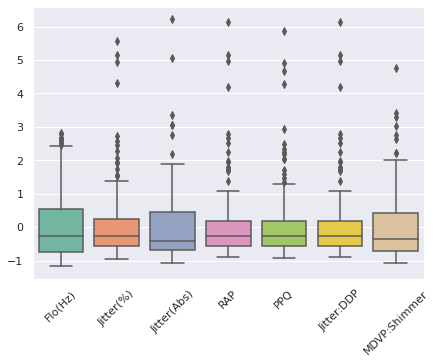

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

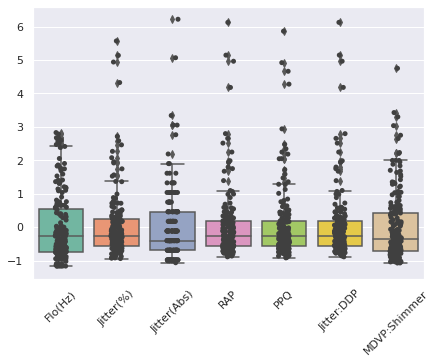

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

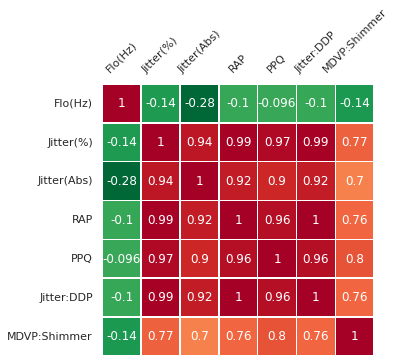

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

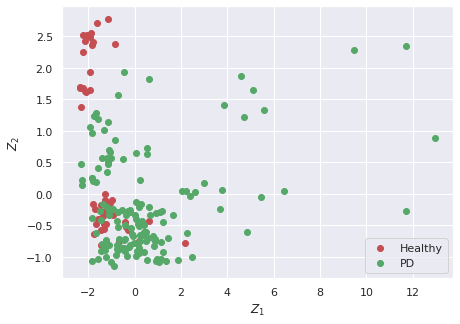

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Healthy)->0,  2(PD)->1, 
idx_Healthy = np.where(y == 0)
idx_PD = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

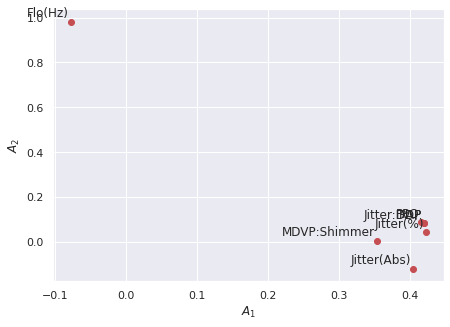

In [ ]:
A = pca.components_.T 
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


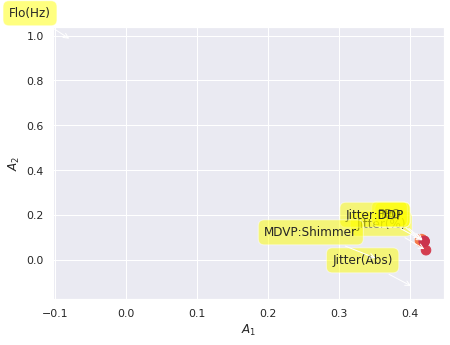

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

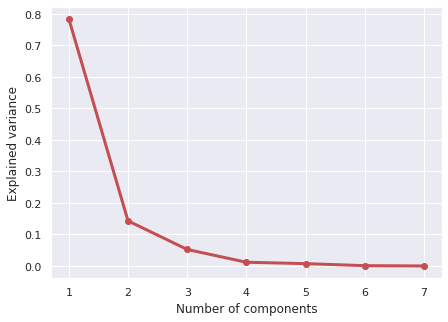

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

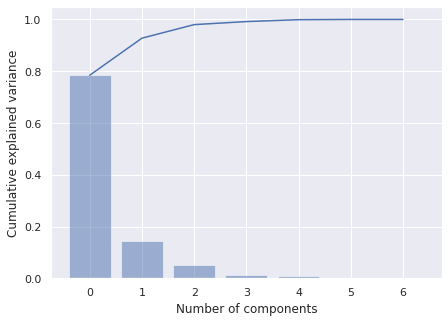

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

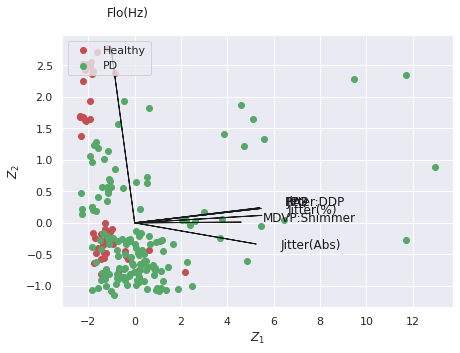

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=27d9df4786044695c8d7a604e809636d7506d5e0ed3e5bd8e09a7990ca300f9e
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=0bef5c2fc1b7649fa13b88f2012407b78287792d38142b04279e7c4a70eeb113
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    1.210384 -0.919886  0.374321
1    2.234514  0.040189  0.978566
2    2.610717  0.030316  0.338137
3    2.367772 -0.027632  0.534368
4    3.781406  0.065245  0.553460
..        ...       ...       ...
190 -0.376667 -0.526463  0.788859
191 -0.285019 -0.579785  0.023005
192  2.179757 -0.779644 -1.191831
193  0.183517 -0.877427 -0.382651
194 -0.490057 -0.853977 -0.359854

[195 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f698a60f1c0>)

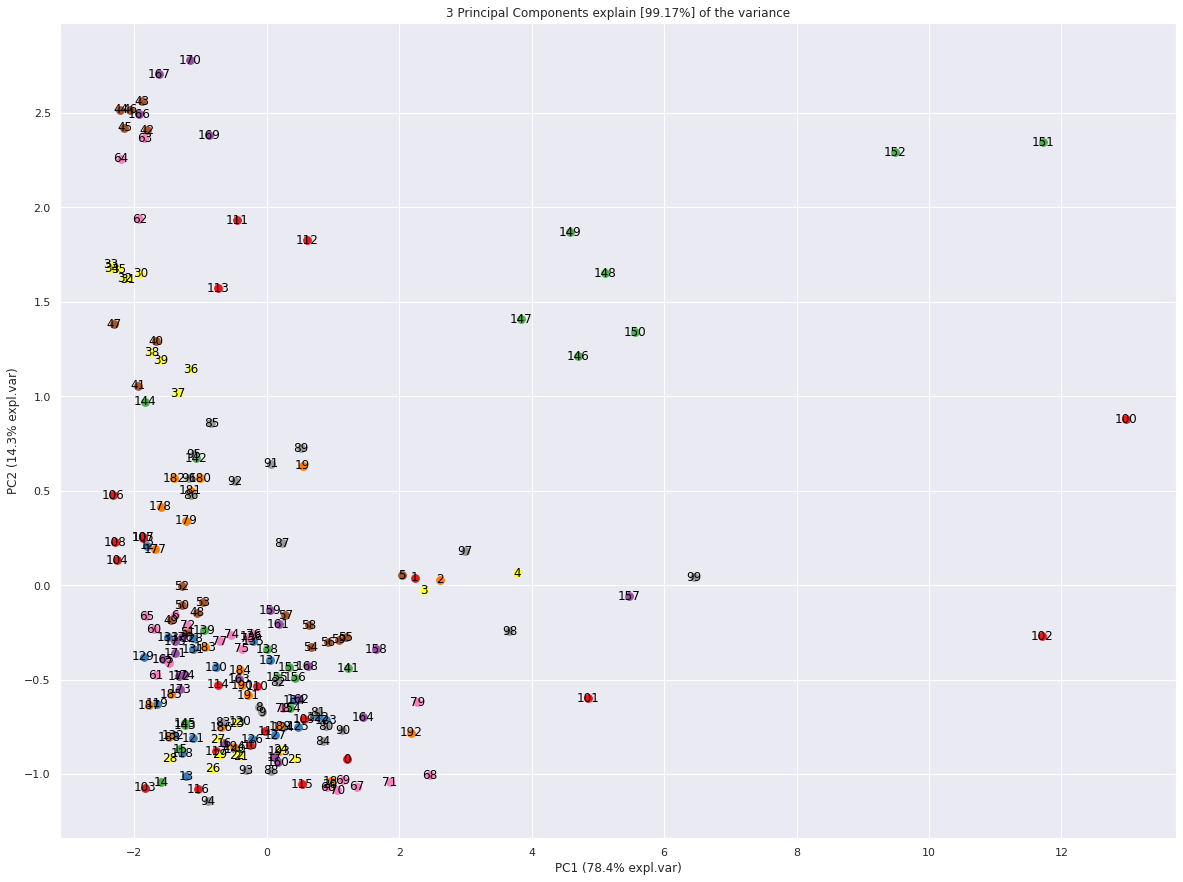

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

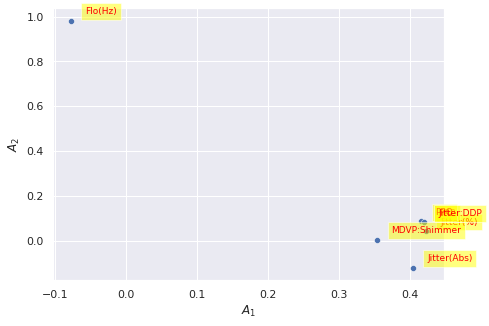

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.03, s=variables[i],
          fontdict=dict(color='red',size=9),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

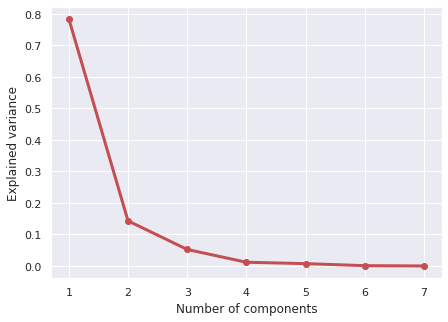

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

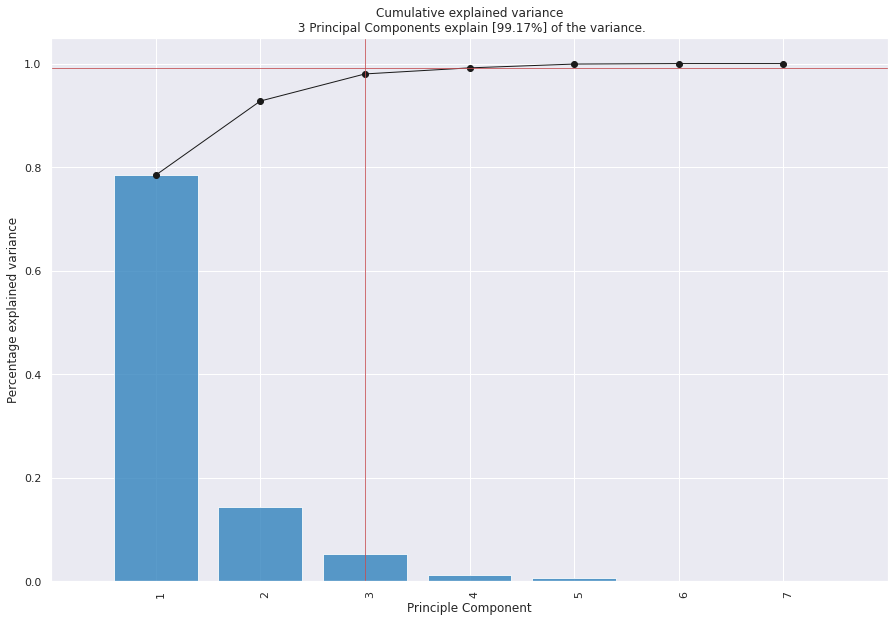

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].


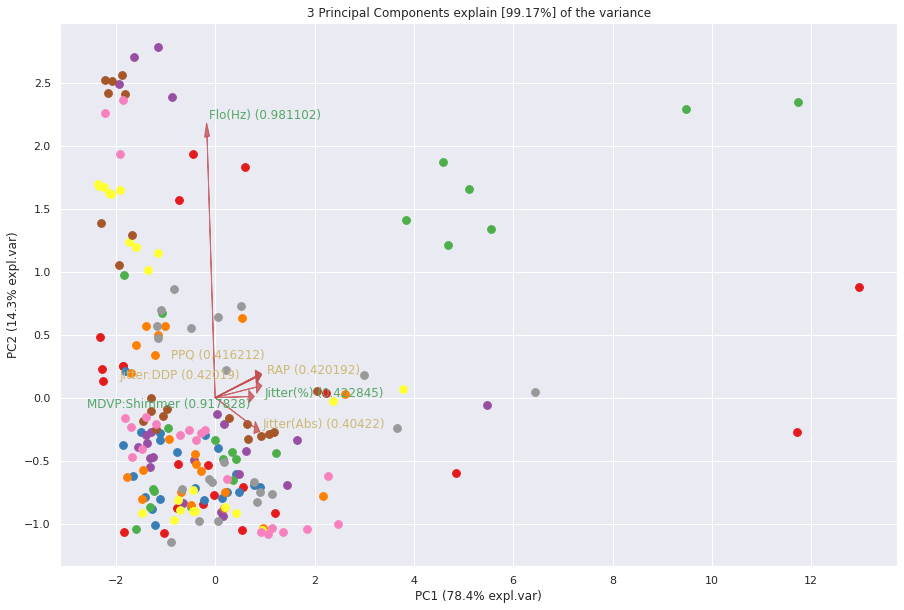

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f699204af10>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].


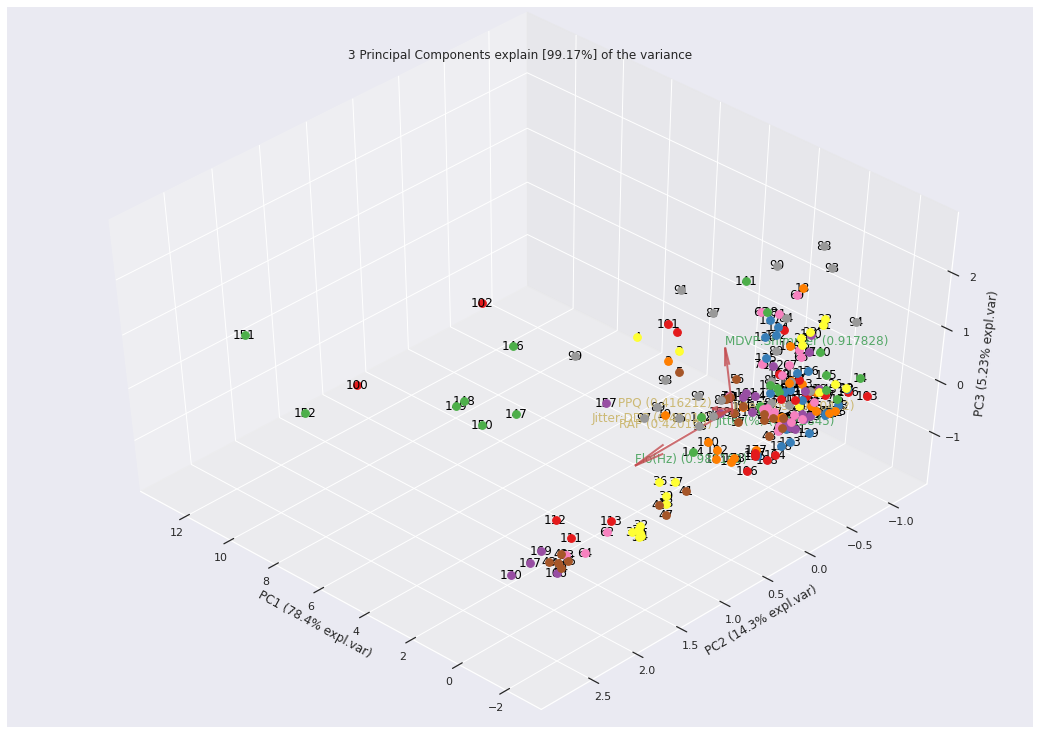

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f698ce9b1f0>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (176, 8)
Unseen Data For Predictions: (19, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='status', train_size=0.7, session_id=123)


Description             Value
0                               session_id               123
1                                   Target            status
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (176, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (123, 6)
12                    Transformed Test Set           (53, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              322f
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='status',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (176, 8) means 176 samples and 8 features including the status column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (176, 8) is transformed into (123, 6) for the transformed train set. Note that by default PyCaret removes variable with perfect collinearity i.e. two variables are 100% correlated.

* **Transformed Test Set** : Displays the shape of the transformed test set. There are 53 samples in test set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9019  0.9415  0.9778  0.9049   
rf               Random Forest Classifier    0.8782  0.8578  0.9456  0.9078   
gbc          Gradient Boosting Classifier    0.8782  0.9126  0.9467  0.9045   
lightgbm  Light Gradient Boosting Machine    0.8776  0.8689  0.9456  0.9106   
ada                  Ada Boost Classifier    0.8551  0.9044  0.9256  0.8947   
dt               Decision Tree Classifier    0.8462  0.7744  0.9156  0.8964   
ridge                    Ridge Classifier    0.8295  0.0000  0.9789  0.8324   
lr                    Logistic Regression    0.8218  0.7241  0.9689  0.8324   
lda          Linear Discriminant Analysis    0.7891  0.7696  0.9256  0.8257   
knn                K Neighbors Classifier    0.7737  0.7252  0.8944  0.8266   
dummy                    Dummy Classifier    0.7558  0.5000  1.0000  0.7558   
qda       Quadratic Discriminant Analysis    0.7231  0.8378  0.6878  0.9298   
nb                            Naive Bayes    0.6814  0.8348  0.6211  0.9342   
svm                   SVM - Linear Kernel    0.4981  0.0000  0.5000  0.3769   

              F1   Kappa     MCC  TT (Sec)  
et        0.9387  0.6924  0.7191     0.175  
rf        0.9231  0.6161  0.6299     0.205  
gbc       0.9223  0.6353  0.6610     0.072  
lightgbm  0.9223  0.6099  0.6398     0.024  
ada       0.9069  0.5701  0.5969     0.089  
dt        0.8986  0.5581  0.5994     0.013  
ridge     0.8982  0.3905  0.4216     0.012  
lr        0.8929  0.3711  0.4038     0.020  
lda       0.8690  0.3092  0.3366     0.043  
knn       0.8557  0.3079  0.3252     0.024  
dummy     0.8609  0.0000  0.0000     0.013  
qda       0.7890  0.4083  0.4525     0.012  
nb        0.7436  0.3650  0.4220     0.013  
svm       0.4298  0.0000  0.0000     0.016

INFO:logs:create_model_container: 41
INFO:logs:master_model_container: 41
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this project, we will work with the first three best-performing models as our candidate models before PCA according to the above table. 

* Extra Trees Classifier ('et')
* Random Forest Classifier ('rf')
* Gradient Boosting Classifier ('gbc')

**Create Extra Trees Classifier**

In [ ]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9333  1.0000  0.8333  0.9091  0.4348  0.5270
1       0.9231  1.0000  1.0000  0.9091  0.9524  0.7547  0.7785
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.9630  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.8333  0.8889  0.8889  0.8889  0.8889  0.5556  0.5556
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.8519  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.8333  0.9630  1.0000  0.8182  0.9000  0.4286  0.5222
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7500  0.8148  0.8889  0.8000  0.8421  0.2500  0.2582
Mean    0.9019  0.9415  0.9778  0.9049  0.9387  0.6924  0.7191
SD      0.0808  0.0644  0.0444  0.0715  0.0508  0.2539  0.2369

INFO:logs:create_model_container: 43
INFO:logs:master_model_container: 43
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'et'. 
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. 
The pre-defined values do not work for all models necessarily and sometimes they need to be changed depending on the model. For each classifier, 4 different search spaces including ”scikit-learn”, ”scikit-
optimize”, ”tune-sklearn”, and ”optuna” are applied and the
best among them is selected.
The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold.

In [ ]:
!pip install scikit-optimize
!pip install tune-sklearn ray[tune]
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Tune Extra Trees Model**

In [ ]:
tuned_et = tune_model(et, search_library='tune-sklearn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9667  1.0000  0.8333  0.9091  0.4348  0.5270
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.9630  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.8333  0.8889  0.8889  0.8889  0.8889  0.5556  0.5556
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.8889  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.8333  0.9259  1.0000  0.8182  0.9000  0.4286  0.5222
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7500  0.7407  0.8889  0.8000  0.8421  0.2500  0.2582
Mean    0.9096  0.9374  0.9778  0.9140  0.9435  0.7169  0.7412
SD      0.0860  0.0779  0.0444  0.0770  0.0540  0.2701  0.2513

INFO:logs:create_model_container: 44
INFO:logs:master_model_container: 44
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


After tuning, model's accuracy improved from 90.19% to 90.96%

In [ ]:
#tuned model object is stored in the variable 'tuned_et'. 
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate Extra Trees Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.8000  1.0000  0.7692  0.8696  0.0000  0.0000
1       0.9231  1.0000  1.0000  0.9091  0.9524  0.7547  0.7785
2       0.9231  1.0000  0.9000  1.0000  0.9474  0.8060  0.8216
3       0.9167  0.8333  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.9167  0.8889  0.8889  1.0000  0.9412  0.8000  0.8165
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.7778  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.7500  0.7778  0.8889  0.8000  0.8421  0.2500  0.2582
8       0.9167  1.0000  0.8889  1.0000  0.9412  0.8000  0.8165
9       0.7500  0.5000  0.8889  0.8000  0.8421  0.2500  0.2582
Mean    0.8782  0.8578  0.9456  0.9078  0.9231  0.6161  0.6299
SD      0.0834  0.1505  0.0545  0.0875  0.0502  0.3088  0.3131

INFO:logs:create_model_container: 45
INFO:logs:master_model_container: 45
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf, search_library='scikit-optimize')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8333  1.0000  0.8333  0.9091  0.4348  0.5270
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.9259  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.8333  0.8889  0.7778  1.0000  0.8750  0.6364  0.6831
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.9259  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.8333  0.7778  1.0000  0.8182  0.9000  0.4286  0.5222
8       0.9167  1.0000  0.8889  1.0000  0.9412  0.8000  0.8165
9       0.7500  0.5185  0.8889  0.8000  0.8421  0.2500  0.2582
Mean    0.9013  0.8870  0.9556  0.9252  0.9362  0.7050  0.7356
SD      0.0807  0.1431  0.0737  0.0805  0.0521  0.2521  0.2322

INFO:logs:create_model_container: 46
INFO:logs:master_model_container: 46
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=5, max_features=0.9064672106211974,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=1.0050001158033484e-08,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       n_estimators=183, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


After tuning, model's accuracy improved from 87.82% to 90.13%

**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=5, max_features=0.9064672106211974,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=1.0050001158033484e-08,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       n_estimators=183, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Gradient Boosting Classifier Model**

In [ ]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.8667  0.9000  0.8182  0.8571  0.2642  0.2725
1       0.9231  1.0000  1.0000  0.9091  0.9524  0.7547  0.7785
2       0.9231  1.0000  0.9000  1.0000  0.9474  0.8060  0.8216
3       0.9167  0.9259  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.9167  0.8889  0.8889  1.0000  0.9412  0.8000  0.8165
5       0.9167  1.0000  1.0000  0.9000  0.9474  0.7500  0.7746
6       0.9167  0.8889  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.8333  0.8148  1.0000  0.8182  0.9000  0.4286  0.5222
8       0.9167  1.0000  0.8889  1.0000  0.9412  0.8000  0.8165
9       0.7500  0.7407  0.8889  0.8000  0.8421  0.2500  0.2582
Mean    0.8782  0.9126  0.9467  0.9045  0.9223  0.6353  0.6610
SD      0.0646  0.0855  0.0535  0.0730  0.0391  0.2159  0.2143

INFO:logs:create_model_container: 47
INFO:logs:master_model_container: 47
INFO:logs:display_container: 10
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Gradient Boosting Classifier Model**

In [ ]:
tuned_gbc = tune_model(gbc, search_library='tune-sklearn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6923  0.7667  0.9000  0.7500  0.8182 -0.1304 -0.1581
1       0.9231  1.0000  1.0000  0.9091  0.9524  0.7547  0.7785
2       0.9231  0.9667  0.9000  1.0000  0.9474  0.8060  0.8216
3       0.9167  1.0000  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.9167  0.9259  0.8889  1.0000  0.9412  0.8000  0.8165
5       0.9167  1.0000  1.0000  0.9000  0.9474  0.7500  0.7746
6       0.8333  0.9630  1.0000  0.8182  0.9000  0.4286  0.5222
7       0.9167  0.7407  1.0000  0.9000  0.9474  0.7500  0.7746
8       0.9167  0.9630  0.8889  1.0000  0.9412  0.8000  0.8165
9       0.8333  0.7037  1.0000  0.8182  0.9000  0.4286  0.5222
Mean    0.8788  0.9030  0.9578  0.8995  0.9242  0.6137  0.6443
SD      0.0707  0.1116  0.0518  0.0812  0.0399  0.2836  0.2887

INFO:logs:create_model_container: 49
INFO:logs:master_model_container: 49
INFO:logs:display_container: 12
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=1,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


After tuning, model's accuracy improved from 87.82% to 87.88%

**Evaluate Gradient Boosting Classifier Model**

In [ ]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=1,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn(default)
tuned_best_model = tune_model(best_model, search_library='tune-sklearn') 

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9667  1.0000  0.8333  0.9091  0.4348  0.5270
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.9630  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.8333  0.8889  0.8889  0.8889  0.8889  0.5556  0.5556
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.8889  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.8333  0.9259  1.0000  0.8182  0.9000  0.4286  0.5222
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7500  0.7407  0.8889  0.8000  0.8421  0.2500  0.2582
Mean    0.9096  0.9374  0.9778  0.9140  0.9435  0.7169  0.7412
SD      0.0860  0.0779  0.0444  0.0770  0.0540  0.2701  0.2513

INFO:logs:create_model_container: 50
INFO:logs:master_model_container: 50
INFO:logs:display_container: 13
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='status', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target            status
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (176, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (123, 3)
12                    Transformed Test Set           (53, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8584
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='status',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='status')),
                ('fix_perfect', Remove_100(target='status')),
                ('clean_names', Clean_Colum_Names()),
     

In [ ]:
best_model_pca1, best_model_pca2, best_model_pca3 = compare_models(n_select=3)

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8769  0.8850  0.9233  0.9175   
et                 Extra Trees Classifier    0.8769  0.9052  0.9444  0.9022   
lightgbm  Light Gradient Boosting Machine    0.8699  0.8200  0.9356  0.9047   
rf               Random Forest Classifier    0.8692  0.8454  0.9456  0.8954   
gbc          Gradient Boosting Classifier    0.8365  0.8415  0.9022  0.8929   
dt               Decision Tree Classifier    0.8199  0.7567  0.8800  0.8889   
ridge                    Ridge Classifier    0.8045  0.0000  0.9456  0.8277   
ada                  Ada Boost Classifier    0.7942  0.8081  0.8789  0.8582   
lda          Linear Discriminant Analysis    0.7891  0.8107  0.9256  0.8257   
lr                    Logistic Regression    0.7795  0.8196  0.9122  0.8222   
dummy                    Dummy Classifier    0.7558  0.5000  1.0000  0.7558   
nb                            Naive Bayes    0.7481  0.8233  0.7633  0.8946   
svm                   SVM - Linear Kernel    0.7237  0.0000  0.8311  0.8285   
qda       Quadratic Discriminant Analysis    0.7147  0.8230  0.7289  0.8849   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9183  0.6607  0.6789     0.037  
et        0.9208  0.6261  0.6327     0.189  
lightgbm  0.9174  0.5973  0.6045     0.023  
rf        0.9173  0.5901  0.6043     0.215  
gbc       0.8938  0.5157  0.5315     0.067  
dt        0.8810  0.4876  0.4954     0.014  
ridge     0.8794  0.3416  0.3703     0.013  
ada       0.8649  0.4051  0.4111     0.087  
lda       0.8690  0.3092  0.3366     0.013  
lr        0.8611  0.2928  0.3032     0.025  
dummy     0.8609  0.0000  0.0000     0.013  
nb        0.8191  0.3928  0.4147     0.013  
svm       0.8101  0.1969  0.2227     0.013  
qda       0.7929  0.3180  0.3448     0.013

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               mi

In [ ]:
best_model_pca1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model1**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca1 = tune_model(best_model_pca1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.7667  1.0000  0.8333  0.9091  0.4348  0.5270
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.9259  0.8889  1.0000  0.9412  0.8000  0.8165
4       0.9167  0.9259  0.8889  1.0000  0.9412  0.8000  0.8165
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8333  0.7778  0.8889  0.8889  0.8889  0.5556  0.5556
7       0.9167  0.8148  1.0000  0.9000  0.9474  0.7500  0.7746
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8333  0.7037  0.8889  0.8889  0.8889  0.5556  0.5556
Mean    0.9263  0.8915  0.9556  0.9511  0.9517  0.7896  0.8046
SD      0.0676  0.1091  0.0544  0.0621  0.0439  0.2035  0.1884

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca1)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tune the Best Model2**

In [ ]:
tuned_best_model_pca2 = tune_model(best_model_pca2, search_library='scikit-optimize')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8000  1.0000  0.8333  0.9091  0.4348  0.5270
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9231  1.0000  0.9000  1.0000  0.9474  0.8060  0.8216
3       0.9167  0.9630  0.8889  1.0000  0.9412  0.8000  0.8165
4       0.9167  0.8889  0.8889  1.0000  0.9412  0.8000  0.8165
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8333  0.7407  0.8889  0.8889  0.8889  0.5556  0.5556
7       0.8333  0.8148  0.8889  0.8889  0.8889  0.5556  0.5556
8       0.9167  1.0000  0.8889  1.0000  0.9412  0.8000  0.8165
9       0.7500  0.7407  0.7778  0.8750  0.8235  0.4000  0.4082
Mean    0.8936  0.8948  0.9122  0.9486  0.9281  0.7152  0.7317
SD      0.0743  0.1057  0.0664  0.0646  0.0506  0.2052  0.1955

INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=8, max_features=0.6877870002297917,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=9.601039817035328e-06,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=76, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Best Model2**

In [ ]:
evaluate_model(tuned_best_model_pca2)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=8, max_features=0.6877870002297917,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=9.601039817035328e-06,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=76, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tune the Best Model3**

In [ ]:
tuned_best_model_pca3 = tune_model(best_model_pca3, search_library='tune-sklearn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.7000  1.0000  0.7692  0.8696  0.0000  0.0000
1       0.9231  0.9667  1.0000  0.9091  0.9524  0.7547  0.7785
2       0.9231  1.0000  0.9000  1.0000  0.9474  0.8060  0.8216
3       0.9167  0.9259  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.7500  0.8519  0.8889  0.8000  0.8421  0.2500  0.2582
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.8148  1.0000  0.9000  0.9474  0.7500  0.7746
7       0.8333  0.7037  1.0000  0.8182  0.9000  0.4286  0.5222
8       0.8333  0.8148  0.8889  0.8889  0.8889  0.5556  0.5556
9       0.8333  0.7407  0.8889  0.8889  0.8889  0.5556  0.5556
Mean    0.8699  0.8519  0.9567  0.8874  0.9184  0.5850  0.6041
SD      0.0745  0.1108  0.0532  0.0725  0.0454  0.2802  0.2808

INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=220, n_jobs=-1, num_leaves=8, objective=None,
               random_state=123, reg_alpha=0.05, reg_lambda=0.15, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate the Best Model3**

In [ ]:
evaluate_model(tuned_best_model_pca3)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=220, n_jobs=-1, num_leaves=8, objective=None,
               random_state=123, reg_alpha=0.05, reg_lambda=0.15, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.8667  1.0000  0.7692  0.8696  0.0000  0.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9167  0.9630  1.0000  0.9000  0.9474  0.7500  0.7746
4       0.8333  0.8889  0.8889  0.8889  0.8889  0.5556  0.5556
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8333  0.6852  0.8889  0.8889  0.8889  0.5556  0.5556
7       0.7500  0.8519  0.8889  0.8000  0.8421  0.2500  0.2582
8       0.9167  1.0000  1.0000  0.9000  0.9474  0.7500  0.7746
9       0.7500  0.7963  0.7778  0.8750  0.8235  0.4000  0.4082
Mean    0.8769  0.9052  0.9444  0.9022  0.9208  0.6261  0.6327
SD      0.0981  0.1021  0.0745  0.0761  0.0637  0.3232  0.3237

INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et_pca = tune_model(et_pca, search_library = 'scikit-optimize')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8000  1.0000  0.8333  0.9091  0.4348  0.5270
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9231  1.0000  0.9000  1.0000  0.9474  0.8060  0.8216
3       0.9167  0.9630  0.8889  1.0000  0.9412  0.8000  0.8165
4       0.9167  0.8889  0.8889  1.0000  0.9412  0.8000  0.8165
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8333  0.7407  0.8889  0.8889  0.8889  0.5556  0.5556
7       0.8333  0.8148  0.8889  0.8889  0.8889  0.5556  0.5556
8       0.9167  1.0000  0.8889  1.0000  0.9412  0.8000  0.8165
9       0.7500  0.7407  0.7778  0.8750  0.8235  0.4000  0.4082
Mean    0.8936  0.8948  0.9122  0.9486  0.9281  0.7152  0.7317
SD      0.0743  0.1057  0.0664  0.0646  0.0506  0.2052  0.1955

INFO:logs:create_model_container: 37
INFO:logs:master_model_container: 37
INFO:logs:display_container: 12
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=8, max_features=0.6877870002297917,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=9.601039817035328e-06,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=76, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=8, max_features=0.6877870002297917,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=9.601039817035328e-06,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=76, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


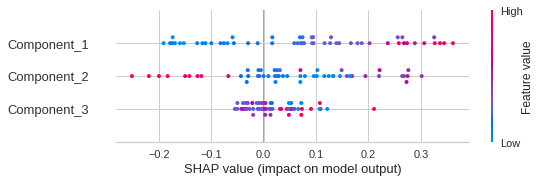

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='summary')

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=1)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=8, max_features=0.6877870002297917,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=9.601039817035328e-06,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=76, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=1, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 1). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=8, max_features=0.6877870002297917,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=9.601039817035328e-06,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=76, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
